In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [2]:
file_path = 'C:/Users/marve/Desktop/names'

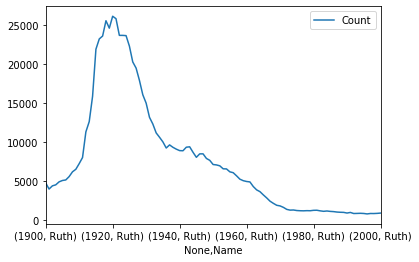

In [3]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(f'{file_path}/yob{year}.txt', names=['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
ruths = names_all[names_all['Name'] == 'Ruth']
ruth_dynamics = ruths.groupby([ruths.index, 'Name']).sum()
ruth_dynamics.plot()

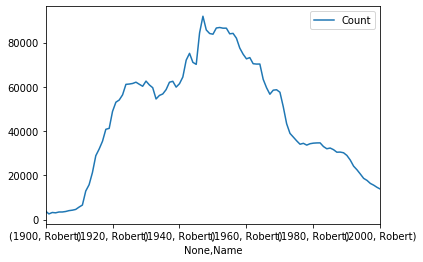

In [4]:
roberts = names_all[names_all['Name'] == 'Robert']
robert_dynamics = roberts.groupby([roberts.index, 'Name']).sum()
robert_dynamics.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x18933710>]],
      dtype=object)

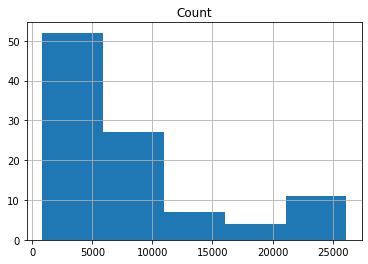

In [5]:
names_per_year = []
for year in range(1900, 2001):
    names = pd.read_csv(f'{file_path}/yob{year}.txt', names=['Name', 'Gender', 'Count'])
    names['Year'] = f'{year}'
    names_per_year.append(names)
all_names = pd.concat(names_per_year)
ruths_wy = all_names[all_names['Name'] == 'Ruth']
ruth_wy_dynamics = ruths_wy.groupby(['Year']).sum()
ruth_wy_dynamics.hist(bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x191D8C30>]],
      dtype=object)

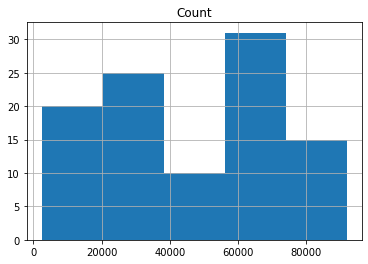

In [6]:
roberts_wy = all_names[all_names['Name'] == 'Robert']
robert_wy_dynamics = roberts_wy.groupby(['Year']).sum()
robert_wy_dynamics.hist(bins=5)

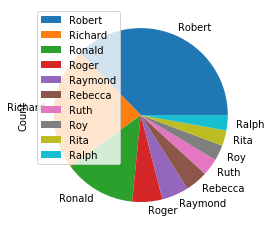

In [7]:
n_1950 = pd.read_csv(f'{file_path}/yob1950.txt', names=['Name', 'Gender', 'Count'])
for i, row in n_1950.iterrows():
    if 'R' not in row['Name']:
        n_1950.drop([i], inplace = True) 
name_dynamics = n_1950.groupby(['Name']).sum().sort_values(by='Count', ascending=False).head(10)
name_dynamics.plot(kind='pie', y='Count')

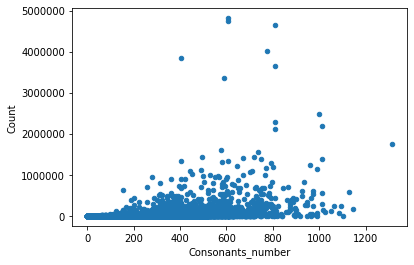

In [8]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(f'{file_path}/yob{year}.txt', names=['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
consonants = ['B', 'b', 'C', 'c', 'D', 'd', 'F', 'f', 'G', 'g', 'H', 'h', 'J', 'j', 'K', 'k', 'L', 'l', 'M', 'm', 'N', 'n', 'P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', 'T', 't', 'V', 'v', 'W', 'w', 'X', 'x', 'Z', 'z']
consonant_numbers = []
for i, row in names_all.iterrows():
    counter = 0
    for letter in row['Name']:
        if letter in consonants:
            counter += 1
    consonant_numbers.append(counter)
names_all['Consonants_number'] = consonant_numbers
name_dynamics = names_all.groupby(['Name']).sum().sort_values(by='Count', ascending=False)
name_dynamics.plot(kind='scatter',x='Consonants_number',y='Count')